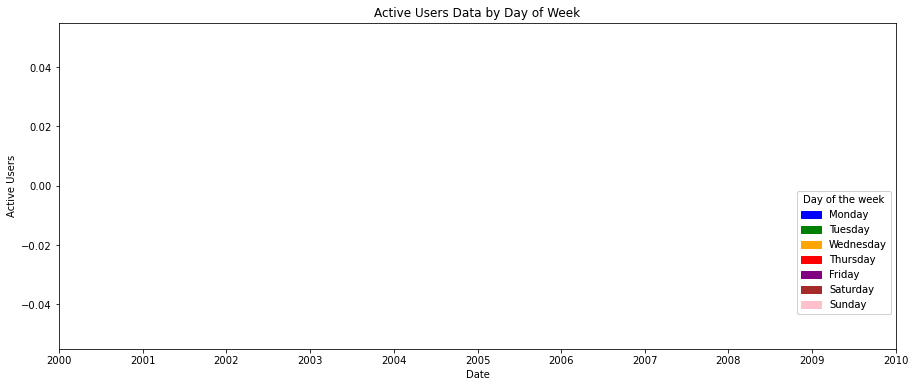

In [2]:
!pip install streamlit
import streamlit as st
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

#df=pd.read_csv("active_users.csv")
#df['ds'] = pd.to_datetime(df['ds'])

# Define colors for each day of the week
dayofweek_colors = {'Monday': 'blue', 'Tuesday': 'green', 'Wednesday': 'orange', 'Thursday': 'red', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'pink'}

# Plot that shows the historical data by day of the week
def plot_data(df, selected_days, selected_dataset):
    plt.close()
    fig, ax = plt.subplots(figsize=(15,6))
    if selected_days:
        df_selected = df[df['ds'].dt.day_name().isin(selected_days)]
        for day in selected_days:
            df_day = df_selected[df_selected['ds'].dt.day_name() == day]
            ax.scatter(df_day['ds'], df_day['y'], c=dayofweek_colors[day], label=day)
        ax.legend()
    else:
        ax.scatter(df['ds'], df['y'], c=df['ds'].dt.dayofweek.map(dayofweek_colors))
        handles = [mpatches.Patch(color=v, label=k) for v, k in zip(dayofweek_colors.values(), dayofweek_colors.keys())]
        legend = ax.legend(handles=handles, bbox_to_anchor=(1, 0.5), title="Day of the week")
        ax.add_artist(legend)
    plt.xlabel('Date')
    plt.ylabel(selected_dataset)
    plt.title("{} Data by Day of Week".format(selected_dataset))
    st.pyplot(fig)


# Load your data into a pandas DataFrame

# Create a multi-select widget to allow the user to select which days to plot
selected_days = st.multiselect('Select days to plot', list(dayofweek_colors.keys()))

# Call the plot_data function to create the plot


active_users_df = pd.read_csv("active_users.csv")
installs_df = pd.read_csv("installs.csv")
playback_duration_df = pd.read_csv("play.csv")

# Create a dictionary to map the dataset names to their corresponding DataFrames
data_dict = {"Active Users": active_users_df, "Installs": installs_df, "Play": playback_duration_df}

# Create a dropdown widget to allow the user to select which dataset to display
selected_dataset = st.selectbox("Select dataset", list(data_dict.keys()))

# Get the DataFrame for the selected dataset
df = data_dict[selected_dataset]
df['ds'] = pd.to_datetime(df['ds'])

# Create a multi-select widget to allow the user to select which days to plot
selected_days = st.multiselect('Select days to plot', list(dayofweek_colors.keys()))

# Call the plot_data function to create the plot
plt.ylabel(selected_dataset)
plot_data(df, selected_days, selected_dataset)



